In [15]:
#1. Data Collection
import pandas as pd
dataset = pd.read_excel("lb.xlsx",  engine='openpyxl' )

In [16]:
dataset

,S.No.,Server Status,Data Progress,Network Traffic (MB/s),Request Size (MB),Threshold,Server Load,Response Time (ms),Priority (0/1)
0,1.0,s2,inprogress,86.55,44.09,0.77,medium,359,1
1,2.0,s3,inprogress,37.39,346.07,0.95,low,200,0
2,3.0,s6,complete,33.81,109.68,0.78,low,447,1
3,4.0,s5,inprogress,45.27,283.95,0.92,low,408,1
4,5.0,s4,complete,74.16,99.97,0.91,medium,320,1
...,...,...,...,...,...,...,...,...,...
1249,NaN,s7,inprogress,300.00,128.00,8.00,medium,172,1
1250,NaN,s4,complete,569.00,411.00,3.00,high,857,0
1251,NaN,s7,inprogress,703.00,79.00,3.00,high,635,1
1252,NaN,s4,inprogress,147.00,562.00,9.00,high,823,0


In [3]:
#2. Data preprocessing

In [17]:
#A) drop S.No. as this is not a real input needed for model prediction
dataset = dataset.drop('S.No.', axis = 1)


In [18]:
#B) Check if we can drop Response Time (ms) as the response time will be the time taken for completion of both a task for Priority 0 and Priority 1

# confirm there are NO relation between Response Time (ms) and Priority (0/1)
dataset.corr()['Priority (0/1)']
# correlation between Response Time(m/s) and Priority = 0.065 but very weak. If its close to 0 we can safely remove 
#Hence we dont want to drop Response Time (ms)


Network Traffic (MB/s)    0.028298
Request Size (MB)        -0.038763
Threshold                 0.017879
Response Time (ms)        0.065705
Priority (0/1)            1.000000
Name: Priority (0/1), dtype: float64

In [19]:
dataset.cov()

,Network Traffic (MB/s),Request Size (MB),Threshold,Response Time (ms),Priority (0/1)
Network Traffic (MB/s),61154.131866,7993.694594,190.127988,10662.117981,3.499888
Request Size (MB),7993.694594,60450.692959,101.465648,5424.108437,-4.766526
Threshold,190.127988,101.465648,7.808581,54.127011,0.024987
Response Time (ms),10662.117981,5424.108437,54.127011,60595.242145,8.089150
Priority (0/1),3.499888,-4.766526,0.024987,8.089150,0.250136


In [21]:
dataset

,Server Status,Data Progress,Network Traffic (MB/s),Request Size (MB),Threshold,Server Load,Response Time (ms),Priority (0/1)
0,s2,inprogress,86.55,44.09,0.77,medium,359,1
1,s3,inprogress,37.39,346.07,0.95,low,200,0
2,s6,complete,33.81,109.68,0.78,low,447,1
3,s5,inprogress,45.27,283.95,0.92,low,408,1
4,s4,complete,74.16,99.97,0.91,medium,320,1
...,...,...,...,...,...,...,...,...
1249,s7,inprogress,300.00,128.00,8.00,medium,172,1
1250,s4,complete,569.00,411.00,3.00,high,857,0
1251,s7,inprogress,703.00,79.00,3.00,high,635,1
1252,s4,inprogress,147.00,562.00,9.00,high,823,0


In [22]:
#C check for null values or 1 or blank values 
print("Server Status", dataset['Server Status'].unique())
print("Data Progress", dataset['Data Progress'].unique())
print("Network Traffic (MB/s)", dataset['Network Traffic (MB/s)'].isnull().sum())
print("Request Size (MB)", dataset['Request Size (MB)'].isnull().sum())
print("Threshold", dataset['Threshold'].isnull().sum())
print("Server Load", dataset['Server Load'].isnull().sum())
print("Response Time (ms)", dataset['Response Time (ms)'].isnull().sum())
print("Response Time (ms)  > 0", (dataset['Request Size (MB)'] > 0).count())
print("Priority (0/1)", dataset['Priority (0/1)'].unique())

Server Status ['s2' 's3' 's6' 's5' 's4' 's7' 's1']
Data Progress ['inprogress' 'complete' 'inprogess']
Network Traffic (MB/s) 0
Request Size (MB) 0
Threshold 0
Server Load 0
Response Time (ms) 0
Response Time (ms)  > 0 1254
Priority (0/1) [1 0]


In [23]:
#D) update Data Progress to inprogress when there is inprogess
dataset['Data Progress'] = dataset['Data Progress'].replace('inprogess', 'inprogress') 
print("Data Progress", dataset['Data Progress'].unique())

Data Progress ['inprogress' 'complete']


In [24]:
dataset['Server Load'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [26]:
#E) Check Outliner and if present replace
from Univariate import Univariate
quan, qual = Univariate.getQuanQual(dataset)

In [27]:
quan

['Network Traffic (MB/s)',
 'Request Size (MB)',
 'Threshold',
 'Response Time (ms)',
 'Priority (0/1)']

In [28]:
qual

['Server Status', 'Data Progress', 'Server Load']

In [29]:
# generate the table with the Lesser outliner and Greater outliner for ear Quan column
descriptive = Univariate.getDescriptiveWithUnivariatesValues(dataset, quan)

In [30]:
descriptive

,Network Traffic (MB/s),Request Size (MB),Threshold,Response Time (ms),Priority (0/1)
Mean,344.626,429.218,4.31093,421.47,0.492026
Median,327,404.5,4,405,0
Mode,299,508,5,262,0
0%,0.54,13.19,0.51,10,0
1%,8.1615,30.06,0.55,17.53,0
Q1:25%,95.2975,227.093,1.47,222.25,0
Q2:50%,327,404.5,4,405,0
Q3:75%,569,633.75,7,617,1
99%,788,892.47,9,892,1
Q4:100%,799,900,9,900,1


In [31]:
outliner_LesserFields_GreaterFields = Univariate.findOutlinerFields(descriptive, quan)

In [32]:
outliner_LesserFields_GreaterFields
# No Outliners found. Which means 'Network Traffic (MB/s)','Request Size (MB)','Threshold','Response Time (ms)','Priority (0/1)' min and max values are withing its Lesser Outlinerand Greater Outliners 
# No Outliner replacement needed

([], [])

In [33]:
# F) Save the preprocessed Dataset as a CSV file
dataset.to_csv('preprocessed_LoadBalancer.csv', index=False)

dataset1 = pd.read_csv("preprocessed_LoadBalancer.csv", index_col= None)

In [39]:
dataset1

,Server Status,Data Progress,Network Traffic (MB/s),Request Size (MB),Threshold,Server Load,Response Time (ms),Priority (0/1)
0,s2,inprogress,86.55,44.09,0.77,medium,359,1
1,s3,inprogress,37.39,346.07,0.95,low,200,0
2,s6,complete,33.81,109.68,0.78,low,447,1
3,s5,inprogress,45.27,283.95,0.92,low,408,1
4,s4,complete,74.16,99.97,0.91,medium,320,1
...,...,...,...,...,...,...,...,...
1249,s7,inprogress,300.00,128.00,8.00,medium,172,1
1250,s4,complete,569.00,411.00,3.00,high,857,0
1251,s7,inprogress,703.00,79.00,3.00,high,635,1
1252,s4,inprogress,147.00,562.00,9.00,high,823,0


In [44]:
# 3 Univariate and Bivariate
# A) Univariate
# A 1) Univariate: Handling NaN
print("Server Status", dataset1['Server Status'].unique())
print("Data Progress", dataset1['Data Progress'].unique())
print("Network Traffic (MB/s)", dataset1['Network Traffic (MB/s)'].isnull().sum())
print("Request Size (MB)", dataset1['Request Size (MB)'].isnull().sum())
print("Threshold", dataset1['Threshold'].isnull().sum())
print("Server Load", dataset1['Server Load'].isnull().sum())
print("Response Time (ms)", dataset1['Response Time (ms)'].isnull().sum())
print("Response Time (ms)  > 0", (dataset1['Request Size (MB)'] > 0).count())
print("Priority (0/1)", dataset1['Priority (0/1)'].unique())

Server Status ['s2' 's3' 's6' 's5' 's4' 's7' 's1']
Data Progress ['inprogress' 'complete']
Network Traffic (MB/s) 0
Request Size (MB) 0
Threshold 0
Server Load 0
Response Time (ms) 0
Response Time (ms)  > 0 1254
Priority (0/1) [1 0]


In [45]:
# A 2)  Univariate:  How many of them are Priority 1?
# Frequency of ‘Priority(1)'' task
PrioritizedTaskCount =dataset1['Priority (0/1)'].value_counts().get(1, 0)
print('PrioritizedTaskCount:', PrioritizedTaskCount, ' where total tasks: ', dataset1['Priority (0/1)'].size)

PrioritizedTaskCount: 617  where total tasks:  1254


In [46]:
# A 3)  Univariate: Find the reason for Priority 1 from the dataset?  
dataset1.corr() 
# Response Time '0.065705' is the higheshest Correlation to the Priority(1)

,Network Traffic (MB/s),Request Size (MB),Threshold,Response Time (ms),Priority (0/1)
Network Traffic (MB/s),1.000000,0.131472,0.275136,0.175150,0.028298
Request Size (MB),0.131472,1.000000,0.147684,0.089621,-0.038763
Threshold,0.275136,0.147684,1.000000,0.078688,0.017879
Response Time (ms),0.175150,0.089621,0.078688,1.000000,0.065705
Priority (0/1),0.028298,-0.038763,0.017879,0.065705,1.000000


In [52]:
# A 4)  Univariate:  What kind of relation between Request Size(MB) and Response Time(ms) 
dataset1[['Request Size (MB)','Response Time (ms)']].corr()

,Request Size (MB),Response Time (ms)
Request Size (MB),1.000000,0.089621
Response Time (ms),0.089621,1.000000


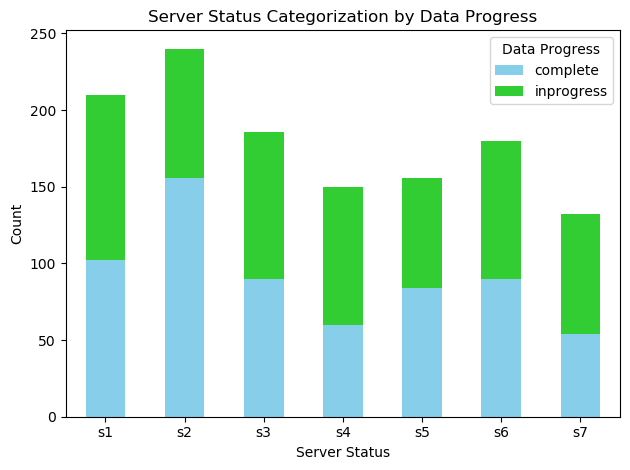

In [57]:
# A 5)  Univariate:  Which Server Status completes the most?
# Counting occurrences of each Server Status within each Data Progress category
summary = dataset1.groupby(['Data Progress', 'Server Status']).size().unstack(fill_value=0)

# Plotting
summary.T.plot(kind='bar', stacked=True, color=['skyblue', 'limegreen'])
plt.title('Server Status Categorization by Data Progress')
plt.xlabel('Server Status')
plt.ylabel('Count')
plt.legend(title='Data Progress', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [59]:
# A 6)  Univariate:  How many of the tasks are above Network Traffic of 344 MB/s
(dataset1['Network Traffic (MB/s)']> 788).value_counts() 




False    1243
True       11
Name: Network Traffic (MB/s), dtype: int64

In [60]:
# A 7)  Univariate:  Is there any relation between Request Size (MB) and Response Time (ms) 
#Test the Analysis of Variance between Request Size (MB) and Response Time (ms) at significance level 5%.(Make decision using Hypothesis Testing)
import scipy.stats as stats
 
stats.f_oneway(dataset1['Request Size (MB)'],dataset['Response Time (ms)'] ) 
#the p-value (0.4305) is greater than the significance level (0.05), you fail to reject the null hypothesis.
# This means there is no statistically significant difference between  and  at the 5% significance level

F_onewayResult(statistic=0.6217905567563512, pvalue=0.4304572675926387)

In [77]:
# A 8)  Univariate: Test the similarity between the Server Load(high) and Data Progress(inprogress) with respect to Priority at significance level of 5%.(Make decision using Hypothesis Testing)
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd 
# Rename columns to avoid spaces
dataset1.rename(columns={"Server Load": "Server_Load", "Data Progress": "Data_Progress", "Priority (0/1)": "Priority"}, inplace=True)
print(dataset1.groupby(['Server_Load', 'Data_Progress']).size())
# Fit the two-way ANOVA model
model = ols('Priority ~ C(Server_Load) + C(Data_Progress) + C(Server_Load):C(Data_Progress)', data=dataset1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

Server_Load  Data_Progress
high         complete         180
             inprogress       252
low          complete         252
             inprogress       216
medium       complete         204
             inprogress       150
dtype: int64
                                     sum_sq      df         F    PR(>F)
C(Server_Load)                     0.390958     2.0  0.785542  0.456098
C(Data_Progress)                   2.101474     1.0  8.444879  0.003725
C(Server_Load):C(Data_Progress)    0.464075     2.0  0.932454  0.393861
Residual                         310.559726  1248.0       NaN       NaN


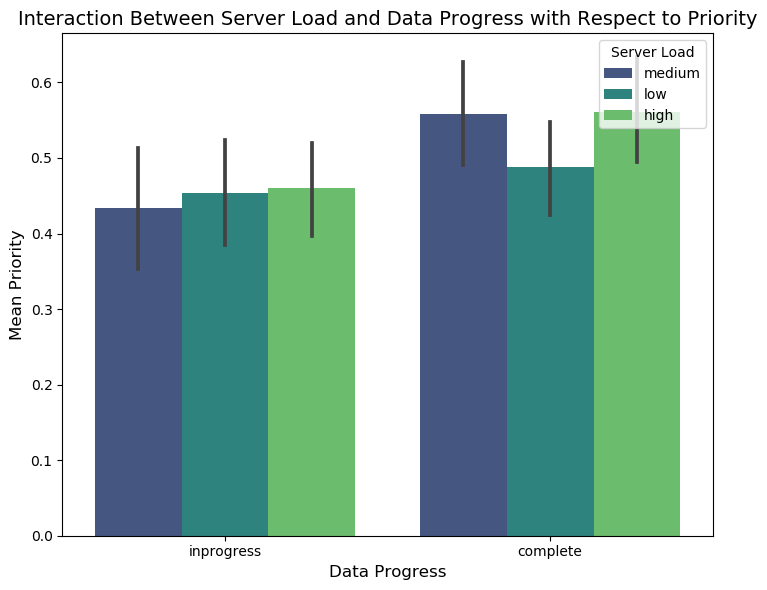

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))
sns.barplot(x='Data_Progress', y='Priority', hue='Server_Load', data=dataset1, palette='viridis')

# Add titles and labels
plt.title('Interaction Between Server Load and Data Progress with Respect to Priority', fontsize=14)
plt.xlabel('Data Progress', fontsize=12)
plt.ylabel('Mean Priority', fontsize=12)
plt.legend(title='Server Load', loc='upper right')
plt.tight_layout()
plt.show()


C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


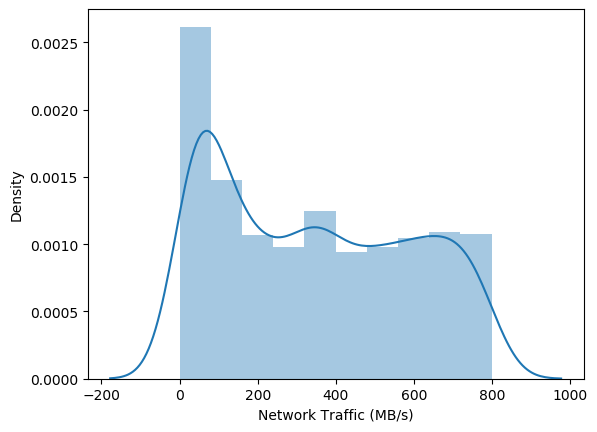

In [80]:
# A 9)  Univariate:  Convert the normal distribution to standard normal distribution for Network Traffic (MB/s) column
import seaborn as sns
# normal distribution
sns.distplot(  dataset1['Network Traffic (MB/s)'])


C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


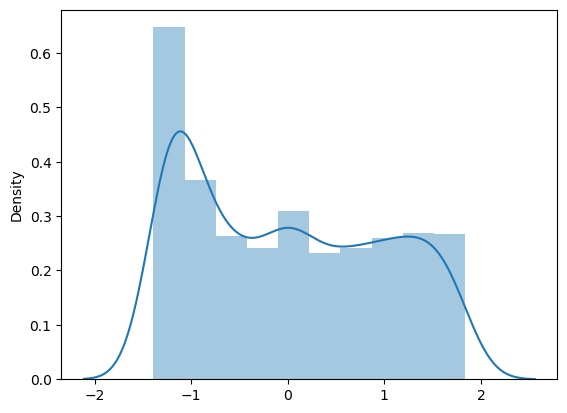

In [81]:
def getStandardNormalDistribution(datasetColumn):
# plot standard normal distribution
    import seaborn as sns
    mean = datasetColumn.mean()
    std = datasetColumn.std() 

    z_score = [(value - mean) / std for value in datasetColumn]
    sns.distplot(z_score, kde=True)

getStandardNormalDistribution(dataset['Network Traffic (MB/s)'])

C:\Users\mpriy\anaconda3\envs\aimlVirtualEnvironment\lib\site-packages\ipykernel_launcher.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  del sys.path[0]


sample_mean: 421.4704944178628  , sample_std:  246.16100858073685
The proability of Density OR The area for the range between(800, 900) = 0.03623363518849169)


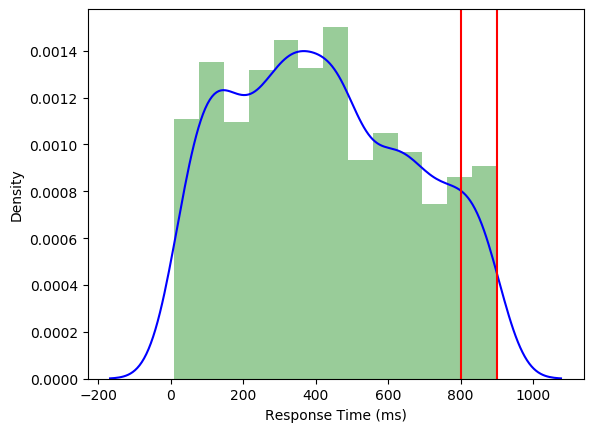

In [89]:
# A 10)  Univariate:  What is the probability Density Function of the Response Time (ms) range from 850 ms to 890 ms?


def getProbablityDensityFunction(datasetColumn, startRange, endRange ):
    import seaborn as sns
    from scipy.stats import norm
    from matplotlib import pyplot
    
    #distplot function will give the histogram and the density curve
    #datasetColumn is the field for which we are finding the density
    #kde True will make the density curve to appear, color bule is for the curve line color, Green is for the histogram
    
    ax = sns.distplot(datasetColumn, kde=True, kde_kws={'color':'blue'}, color='Green')
    #axvline is for the X-axis startRange and endRange for the lines to be in Red
    pyplot.axvline (startRange, color = 'Red')
    pyplot.axvline(endRange, color = 'Red')
     
        
    #sample_mean and sample_std  is for storing the mean and std for the dataset field 
    sample_mean = datasetColumn.mean()
    sample_std = datasetColumn.std()
    print("sample_mean:", sample_mean, " , sample_std: ",sample_std )
    # to find the normal distribution
    distribution = norm(sample_mean,sample_std)
    
    # below values[] is for all the value between the startRange and endRange
    # for each value in the range() the returned value gets places in the values[]
    values = [value for value in range(startRange, endRange)] 
    
    #to get probability distribution use pdf
    # get probability distibution of each value between the start and end range
    probablilites = [distribution.pdf(value) for value in values]
    # get the total probability distribution for the given range
    probabilitiesDensity = sum(probablilites)    
    print("The proability of Density OR The area for the range between({}, {}) = {})" .format(startRange, endRange, probabilitiesDensity))

getProbablityDensityFunction(dataset1['Response Time (ms)'], 800,900 )


In [90]:
# A 11)  Univariate:  Test the similarity between the Server Status(s2)with respect to Request Size (MB) and Threshold at significance level of 5%.(Make decision using Hypothesis Testing)


from scipy.stats import ttest_rel
s2_RequestSize = dataset[dataset['Server Status']=='s2']['Request Size (MB)'] 
s2_Threshold = dataset[dataset['Server Status']=='s2']['Threshold'] 
ttest_rel(s2_RequestSize, s2_Threshold)


Ttest_relResult(statistic=26.154854324915355, pvalue=4.4604225343314296e-72)

In [91]:
# A 12)  Univariate:  Which parameter is highly correlated with Priority?
dataset1.corr()

,Network Traffic (MB/s),Request Size (MB),Threshold,Response Time (ms),Priority
Network Traffic (MB/s),1.000000,0.131472,0.275136,0.175150,0.028298
Request Size (MB),0.131472,1.000000,0.147684,0.089621,-0.038763
Threshold,0.275136,0.147684,1.000000,0.078688,0.017879
Response Time (ms),0.175150,0.089621,0.078688,1.000000,0.065705
Priority,0.028298,-0.038763,0.017879,0.065705,1.000000


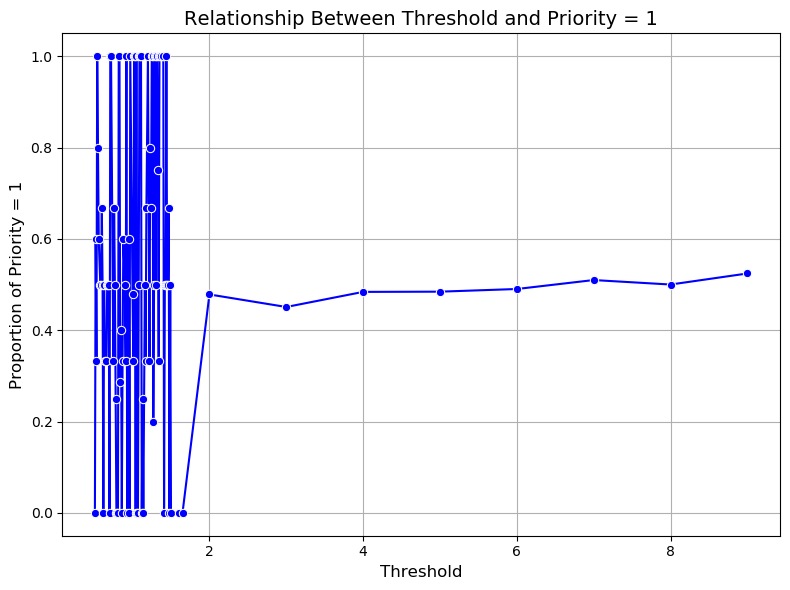

In [94]:
# A 13.A)  Univariate:  Does higher threshold get more priority 1  
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group data to calculate the proportion of Priority = 1 for each Threshold
threshold_priority_grouped = dataset1.groupby('Threshold')['Priority'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(8, 6))
sns.lineplot(data=threshold_priority_grouped, x='Threshold', y='Priority', marker='o', color='blue')

# Add titles and labels
plt.title('Relationship Between Threshold and Priority = 1', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Proportion of Priority = 1', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

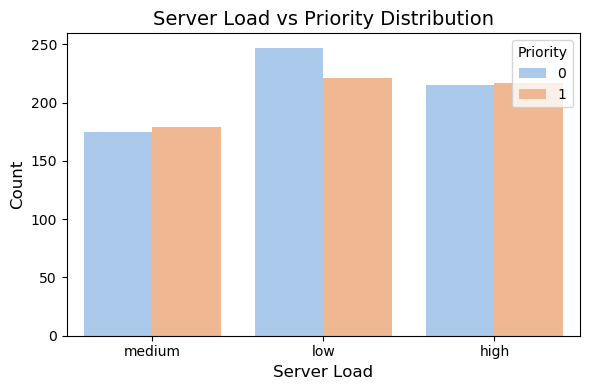

In [100]:
# A 13.B)  Univariate:  Do Task server load relate to Priority.
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset1, x='Server_Load', hue='Priority', palette='pastel')

# Adding labels and title
plt.title('Server Load vs Priority Distribution', fontsize=14)
plt.xlabel('Server Load', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Priority', loc='upper right')
plt.tight_layout()
plt.show()

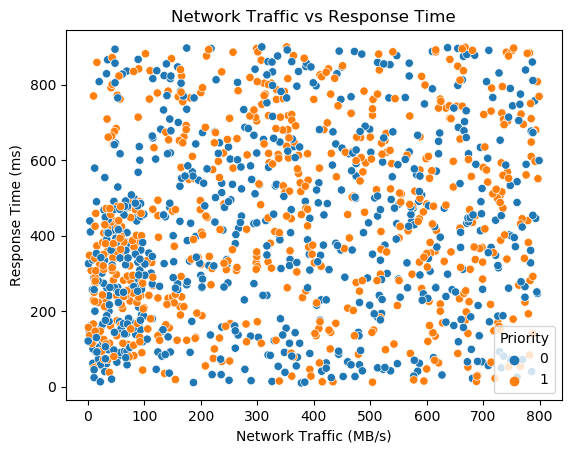

In [102]:
# A 13.C)  Univariate: Relation between Network Traffic (MB/s) and Response Time (ms)
sns.scatterplot(data=dataset1, x='Network Traffic (MB/s)', y='Response Time (ms)', hue='Priority')
plt.title('Network Traffic vs Response Time')
plt.show()


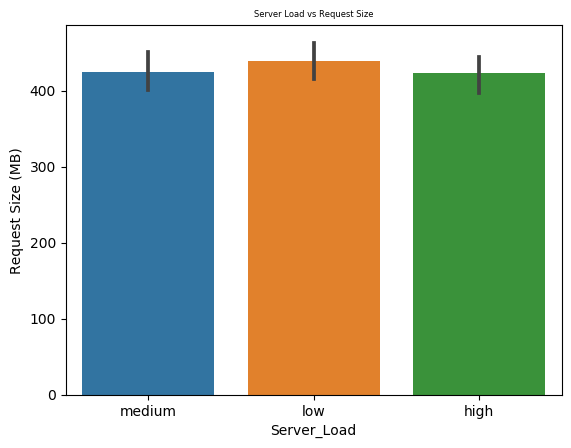

<Figure size 300x300 with 0 Axes>

In [114]:
# A 13.D)  Univariate:  Server Load vs Request Size relation

sns.barplot(data=dataset1, x='Server_Load', y='Request Size (MB)' )
plt.title('Server Load vs Request Size', fontsize=6)
plt.figure(figsize=(3, 3))
plt.show()


In [116]:
# B) Bivariate 
# B 1) Bivariate: Co-variance 
dataset1.cov()
# Threshold & Priority: Covariance = 0.02 (close to 0, suggesting almost no linear relationship).
#  Network Traffic & Response Time:  Covariance = 10662.12 A positive covariance (10662.12) suggests that as Network Traffic increases, Response Time also tends to increase.

,Network Traffic (MB/s),Request Size (MB),Threshold,Response Time (ms),Priority
Network Traffic (MB/s),61154.131866,7993.694594,190.127988,10662.117981,3.499888
Request Size (MB),7993.694594,60450.692959,101.465648,5424.108437,-4.766526
Threshold,190.127988,101.465648,7.808581,54.127011,0.024987
Response Time (ms),10662.117981,5424.108437,54.127011,60595.242145,8.089150
Priority,3.499888,-4.766526,0.024987,8.089150,0.250136


In [118]:

# B 2) Bivariate: Co-relation
dataset.corr()
# Network Traffic (MB/s) and Threshold 0.275136 
#Moderate positive correlation, suggesting higher thresholds are somewhat associated with higher network traffic
# Priority vs Other Factors:
# The correlations for  are weak (close to 0), implying limited linear relationships with the other variables.

,Network Traffic (MB/s),Request Size (MB),Threshold,Response Time (ms),Priority (0/1)
Network Traffic (MB/s),1.000000,0.131472,0.275136,0.175150,0.028298
Request Size (MB),0.131472,1.000000,0.147684,0.089621,-0.038763
Threshold,0.275136,0.147684,1.000000,0.078688,0.017879
Response Time (ms),0.175150,0.089621,0.078688,1.000000,0.065705
Priority (0/1),0.028298,-0.038763,0.017879,0.065705,1.000000


In [119]:
# B 3) Bivariate: Multicolinearity

from Univariate import Univariate
quan, qual = Univariate.getQuanQual(dataset1)

In [124]:
quan

['Network Traffic (MB/s)',
 'Request Size (MB)',
 'Threshold',
 'Response Time (ms)',
 'Priority']

In [125]:
qual

['Server Status', 'Data_Progress', 'Server_Load']

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
    #creates vif as a table fram
    vif = pd.DataFrame()
    #vif table columns will be same as out input columns for this function
    vif["variables"] = X.columns
    
    #X.shape[1] brings back the count of vif columns if there are 6 values in the input, it brings back 6
    #calculate VIF: for each of the column(i.e:i) find multi correlation across all the coumns of the quan 
    vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif

vif = cal_vif(dataset1[quan])
 

In [128]:
vif
# All  variables have VIF < 5, which suggests that multicollinearity isn't severe in this dataset. 

,variables,VIF
0,Network Traffic (MB/s),3.150980
1,Request Size (MB),3.311837
2,Threshold,3.322192
3,Response Time (ms),3.341223
4,Priority,1.802977


In [130]:
# B 4) Bivariate: T test
# Question1: Find if there are any differece in priority for a task in  Requestsize and network traffic in priority
#1 condtion vale(priority) 2 group value(0,1)
#  two-sample independent T-test

from scipy.stats import ttest_ind
Priority1Group = dataset1[dataset1['Priority'] == 1]['Threshold']
Priority0Group = dataset1[dataset1['Priority'] == 0]['Threshold']
t_test2 = ttest_ind(Priority1Group, Priority0Group) 
#pvalue = 52% and > 5%.
# There is no significant difference in the  values for tasks between the two  groups.
# Since the p-value (0.5270) is greater than 0.05, you fail to reject the null hypothesis.
# Threshold does not meaningfully impact whether a task has a 1 or 0 priority from your dataset.
print(t_test2)

Ttest_indResult(statistic=0.6327310273882053, pvalue=0.5270248452319657)


In [131]:
Priority1Group = dataset1[dataset1['Priority'] == 1]['Network Traffic (MB/s)']
Priority0Group = dataset1[dataset1['Priority'] == 0]['Network Traffic (MB/s)']
t_test3 = ttest_ind(Priority1Group, Priority0Group)
#pvalue = 31% and > 5%.
# There is no significant difference in the  values for tasks between the two  groups.
# Since the p-value (0.31) is greater than 0.05, you fail to reject the null hypothesis.
# Network Traffic does not meaningfully impact whether a task has a 1 or 0 priority from your dataset.
print(t_test2)print(t_test3)

Ttest_indResult(statistic=1.0016808034024962, pvalue=0.3166913342377649)


In [134]:
# # B 5) Bivariate: One-Way ANOVA
import scipy.stats as stats
stats.f_oneway(dataset1['Network Traffic (MB/s)'], dataset1['Request Size (MB)'], dataset1['Threshold'], dataset1['Response Time (ms)'])
# p-value = 0.0: Indicates a statistically significant difference (less than 0.05 threshold).
#Since the p-value is 0.0, you reject the null hypothesis and conclude that there is a statistically significant difference between the means of 'Network Traffic (MB/s)', Request Size (MB)','Threshold' and 'Response Time (ms)'.

F_onewayResult(statistic=1109.1963109525607, pvalue=0.0)